# Study Text Using Data Science

In this example, we will explore statistics for two classic novels: The Adventures of Huckleberry Finn by Mark Twain, and Little Women by Louisa May Alcott. 

The text of any book can be read by a computer at great speed. Books published before 1923 are currently in the public domain, meaning that everyone has the right to copy or use the text in any way. [Project Gutenberg](https://www.gutenberg.org/) is a website that publishes public domain books online. Using Python, we can load the text of these books directly from the web.

### Getting the Data

Often the first step in data sciences is getting the data.
The following is a tiny program to download text from the web.

In [ ]:
def read_url(url):
    from urllib.request import urlopen
    import re
    return re.sub('\\s+', ' ', urlopen(url).read().decode())

In [2]:
huck_finn_url = 'https://www.inferentialthinking.com/data/huck_finn.txt'
huck_finn_text = read_url(huck_finn_url)
huck_finn_chapters = huck_finn_text.split('CHAPTER ')[44:]

In [3]:
little_women_url = 'https://www.inferentialthinking.com/data/little_women.txt'
little_women_text = read_url(little_women_url)
little_women_chapters = little_women_text.split('CHAPTER ')[1:]

Let's look at the text from the first chapter of Huckleberry Finn:

### Working with Tables

A lot of data science is about transforming data often to produce tables that we can more easily analyze. In this class you will use the Berkeley datascience library to manipulate and data.

In [4]:
from datascience import *

/Users/yding/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [5]:
Table().with_column('Chapters', huck_finn_chapters)

Chapters
I. YOU don't know about me without you have read a book ...
II. WE went tiptoeing along a path amongst the trees bac ...
"III. WELL, I got a good going-over in the morning from o ..."
"IV. WELL, three or four months run along, and it was wel ..."
V. I had shut the door to. Then I turned around and ther ...
"VI. WELL, pretty soon the old man was up and around agai ..."
"VII. ""GIT up! What you 'bout?"" I opened my eyes and look ..."
VIII. THE sun was up so high when I waked that I judged ...
IX. I wanted to go and look at a place right about the m ...
X. AFTER breakfast I wanted to talk about the dead man a ...


We will explore data by extracting summaries. For example, we might ask, how often characters appeared in each chapter. We can use snippets of code to answer these questions.

In [6]:
import numpy as np

In [7]:
np.char.count(huck_finn_chapters, 'Tom')

array([ 6, 24,  5,  0,  0,  0,  2,  2,  0,  0,  2,  3,  1,  0,  0,  0,  3,
        5,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  1,  4, 19, 15,
       14, 18,  9, 32, 11, 11,  8, 30,  6])

In [8]:
np.char.count(huck_finn_chapters, 'Jim')

array([ 0, 16,  0,  8,  0,  0,  0, 22, 11, 19,  4, 20,  9,  6, 16, 28,  0,
       10, 13, 18,  1,  0,  9,  5,  0,  0,  0,  1,  3,  5, 17,  0,  5, 17,
       18, 23,  4, 27, 10, 13,  0, 12,  6])

We can convert the results of our analysis into more tables.

In [9]:
counts = Table().with_columns([
    'Tom', np.char.count(huck_finn_chapters, 'Tom'),
    'Jim', np.char.count(huck_finn_chapters, 'Jim'),
    'Huck', np.char.count(huck_finn_chapters, 'Huck'),
])
counts

Tom,Jim,Huck
6,0,3
24,16,2
5,0,2
0,8,1
0,0,0
0,0,2
2,0,0
2,22,5
0,11,1
0,19,0


In [10]:
def table_cumsum(table):
    num_columns = table.num_columns
    labels = table.labels
    new_table = Table()
    for i in range(num_columns):
        new_table = new_table.with_column(labels[i], np.cumsum(table.column(labels[i])))
    return new_table

### Visualize Data

Plot the cumulative counts: How many times in Chapter 1, how many times in Chapters 1 and 2, and so on.

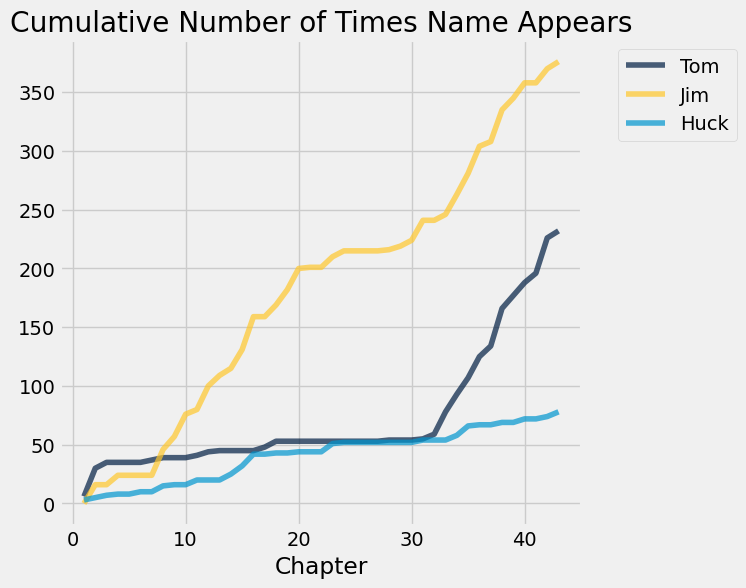

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
cum_counts = table_cumsum(counts).with_column('Chapter', np.arange(1, 44, 1))
cum_counts.plot(column_for_xticks="Chapter")
plt.title('Cumulative Number of Times Name Appears');

We can explore the characters in Little Women using the same kind of analysis.

In [12]:
# Counts of names in the chapters of Little Women
names = ['Amy', 'Beth', 'Jo', 'Laurie', 'Meg']
mentions = {name: np.char.count(little_women_chapters, name) for name in names}
counts = Table().with_columns([
        'Amy', mentions['Amy'],
        'Beth', mentions['Beth'],
        'Jo', mentions['Jo'],
        'Laurie', mentions['Laurie'],
        'Meg', mentions['Meg']
    ])

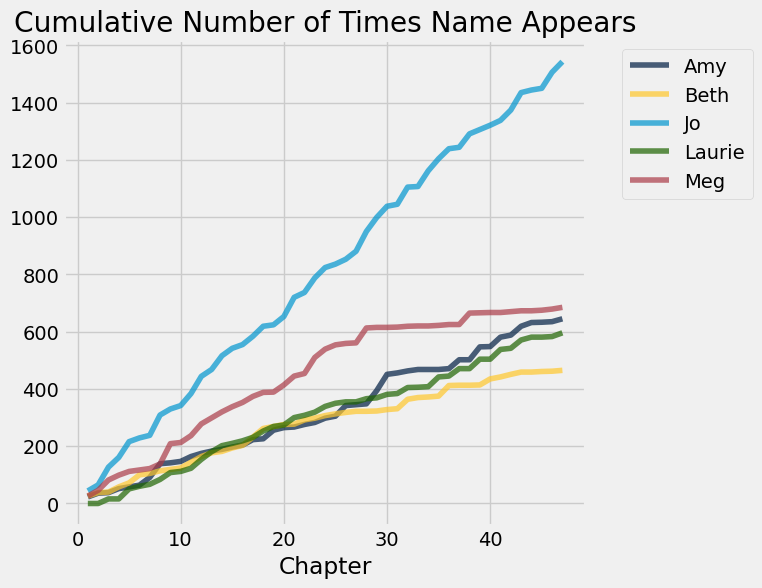

In [13]:
# Plot the cumulative counts
Table.static_plots()
cum_counts = table_cumsum(counts).with_column('Chapter', np.arange(1, 48, 1))
cum_counts.plot(column_for_xticks=5)
plt.title('Cumulative Number of Times Name Appears');

We can use interactive tools.

In [14]:
# Plot the cumulative counts
Table.interactive_plots()
cum_counts = table_cumsum(counts).with_column('Chapter', np.arange(1, 48, 1))
cum_counts.plot(column_for_xticks=5)

### Examining length

How long are the books? How long are sentences?

In [15]:
len(read_url(huck_finn_url))

588035

In [16]:
# In each chapter, count the number of all characters;
# call this the "length" of the chapter.
# Also count the number of periods.

length_hf = Table().with_columns([
        'Length', [len(s) for s in huck_finn_chapters],
        'Periods', np.char.count(huck_finn_chapters, '.')
    ])
length_lw = Table().with_columns([
        'Length', [len(s) for s in little_women_chapters],
        'Periods', np.char.count(little_women_chapters, '.')
    ])

In [17]:
# The counts for Huckleberry Finn
length_hf

Length,Periods
7026,66
11982,117
8529,72
6799,84
8166,91
14550,125
13218,127
22208,249
8081,71
7036,70


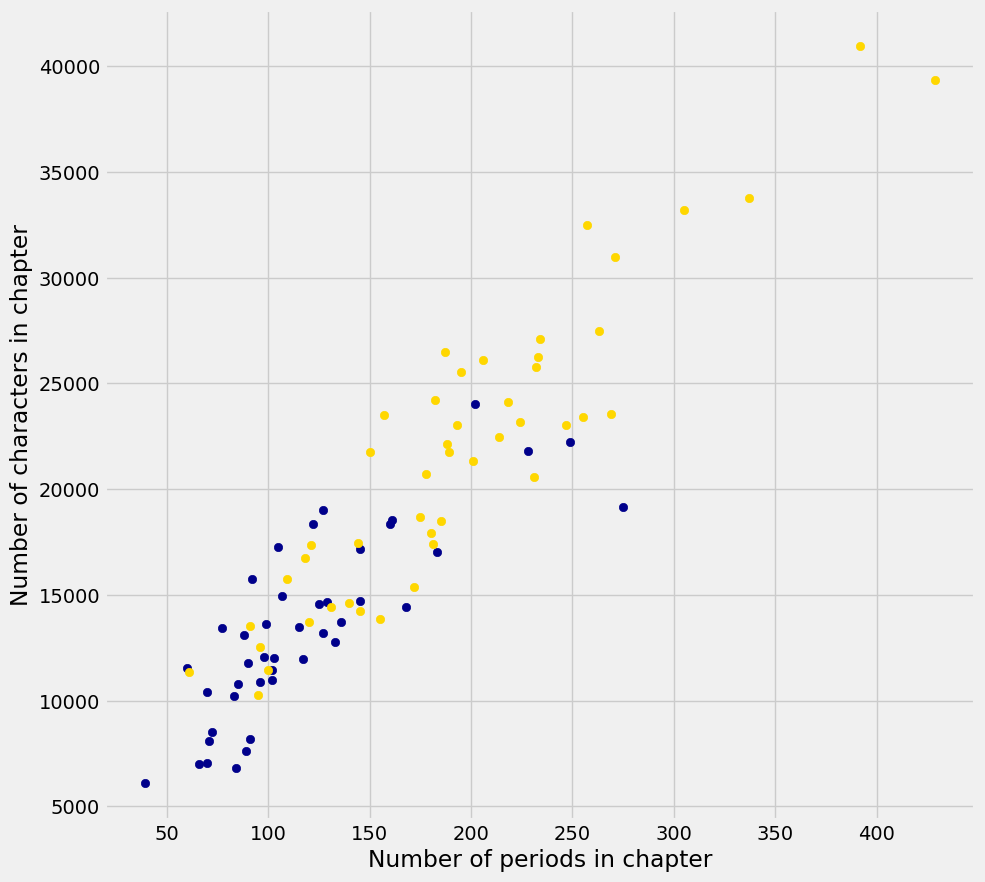

In [18]:
Table.static_plots()
plt.figure(figsize=(10,10))
plt.scatter(length_hf[1], length_hf[0], color='darkblue')
plt.scatter(length_lw[1], length_lw[0], color='gold')
plt.xlabel('Number of periods in chapter')
plt.ylabel('Number of characters in chapter');

### Examining distributions**

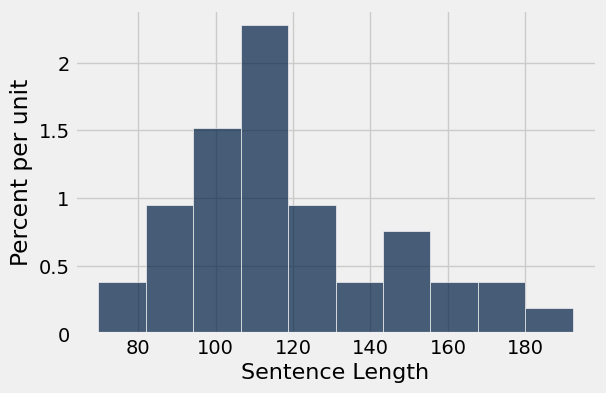

In [19]:
Table.static_plots()
length_hf.with_columns("Sentence Length", length_hf['Length']/length_hf['Periods']).hist("Sentence Length")

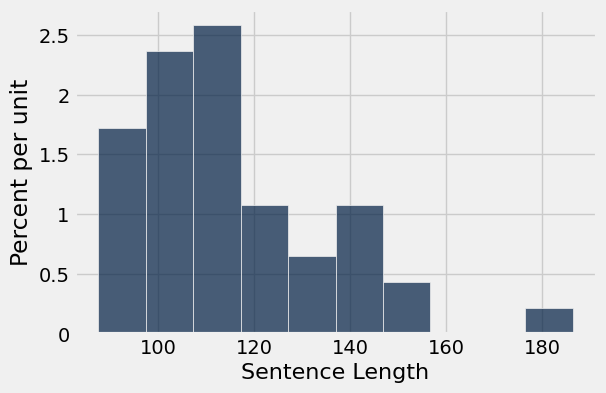

In [20]:
Table.static_plots()
length_lw.with_columns("Sentence Length", length_lw['Length']/length_lw['Periods']).hist("Sentence Length")